In [2]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

#Make sure to include all of these in your project for analysis

In [130]:
#uploading the stata data file from my Econ file on my computer directly into the jupyter notebook.

path_to_file = '/Users/Theodore/Desktop/ECON628-01twisinski5026/datasets/summer_research/Dec-06Colombia.dta'
df = pd.read_stata(path_to_file)

In [5]:
df.tail(5).T

,2899,2900,2901,2902,2903
ANumber,364,364,364,364,364
SessionNumber,4,5,6,7,8
Name,Villa Lopez Cristian,Villa Lopez Cristian,Villa Lopez Cristian,Villa Lopez Cristian,Villa Lopez Cristian
IDNumber,1.00009e+09,1.00009e+09,1.00009e+09,1.00009e+09,1.00009e+09
Consent,Yes,Yes,Yes,Yes,Yes
Institucion,SJB C,SJB C,SJB C,SJB C,SJB C
SessionDate,9.14202e+06,8.01202e+06,8.15202e+06,8.29202e+06,9.14202e+06
Age,15,15,15,15,15
Gender,No,No,No,No,No
CellPhone1HaveCell,Yes,Yes,Yes,Yes,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 2903
Columns: 205 entries, ANumber to classcluster
dtypes: category(80), float32(37), float64(70), int16(1), int8(1), object(16)
memory usage: 2.6+ MB


In [10]:
df.dtypes

ANumber                          int16
SessionNumber                     int8
Name                            object
IDNumber                       float64
Consent                       category
Institucion                     object
SessionDate                    float64
Age                            float64
Gender                        category
CellPhone1HaveCell            category
HaveWhatsApp                  category
FunctioningTV                 category
FunctioningDVDPlayer          category
FunctioningWashingMachine     category
FunctioningRefrigerator       category
Moto                          category
Carro                         category
Familyowndwelling             category
Internet                      category
MissMeals                     category
MealsMissed                    float64
DecisionMaker                   object
EconomicCondition14           category
MissSchoolInpast2weeks         float64
HowmanydaysMissedlasttwowe     float64
TravelTimetoSchool14     

In [11]:
df.isnull().sum()

ANumber                          0
SessionNumber                    0
Name                             0
IDNumber                      1096
Consent                       1704
Institucion                      0
SessionDate                     11
Age                            496
Gender                         456
CellPhone1HaveCell             472
HaveWhatsApp                   488
FunctioningTV                  456
FunctioningDVDPlayer           480
FunctioningWashingMachine      456
FunctioningRefrigerator        464
Moto                           456
Carro                          464
Familyowndwelling              464
Internet                       488
MissMeals                      464
MealsMissed                    496
DecisionMaker                    0
EconomicCondition14            480
MissSchoolInpast2weeks         456
HowmanydaysMissedlasttwowe     456
TravelTimetoSchool14           456
Modeoftravel                   456
Job                            456
Whatjob             

In [12]:
df.loc[df['AvgBaseEsteem'].isnull()].T

,8,9,10,11,12,13,14,15,96,97,...,2854,2855,2888,2889,2890,2891,2892,2893,2894,2895
ANumber,2,2,2,2,2,2,2,2,13,13,...,358,358,363,363,363,363,363,363,363,363
SessionNumber,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,ALVAREZ HIGUITA JENNIFER YULIANA,Giraldo Gariria Jhou Alexander,Giraldo Gariria Jhou Alexander,...,Ramirez Galeano Carolina,Ramirez Galeano Carolina,Traslavina Gomez Laura,Traslavina Gomez Laura,Traslavina Gomez Laura,Traslavina Gomez Laura,Traslavina Gomez Laura,Traslavina Gomez Laura,Traslavina Gomez Laura,Traslavina Gomez Laura
IDNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00044e+09,1.00044e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Institucion,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,...,SJB C,SJB C,SJB C,SJB C,SJB C,SJB C,SJB C,SJB C,SJB C,SJB C
SessionDate,7.22202e+06,8.05202e+06,8.19202e+06,9.02202e+06,7.22202e+06,7.22202e+06,7.22202e+06,7.22202e+06,NaN,8.05202e+06,...,8.29202e+06,9.14202e+06,8.01202e+06,8.15202e+06,8.29202e+06,9.14202e+06,8.01202e+06,8.15202e+06,8.29202e+06,9.14202e+06
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CellPhone1HaveCell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df["AvgBaseEsteem"]=df.groupby("TreatmentGroup").transform(lambda x: x.fillna(x.mean()))

In [14]:
df.loc[df['AvgBaseEsteem'].isnull()].T

""
ANumber
SessionNumber
Name
IDNumber
Consent
Institucion
SessionDate
Age
Gender
CellPhone1HaveCell


In [19]:
df['Gender'].describe().T

count     2448
unique       2
top         No
freq      1248
Name: Gender, dtype: object

In [20]:
df['Gender']

0        No
1        No
2        No
3        No
4        No
5        No
6        No
7        No
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16       No
17       No
18       No
19       No
20       No
21       No
22       No
23       No
24       No
25       No
26       No
27       No
28       No
29       No
       ... 
2874     No
2875     No
2876     No
2877     No
2878     No
2879     No
2880     No
2881     No
2882     No
2883     No
2884     No
2885     No
2886     No
2887     No
2888    NaN
2889    NaN
2890    NaN
2891    NaN
2892    NaN
2893    NaN
2894    NaN
2895    NaN
2896     No
2897     No
2898     No
2899     No
2900     No
2901     No
2902     No
2903     No
Name: Gender, dtype: category
Categories (2, object): [No < Yes]

In [47]:
#If I want the mean and standard deviation quite often, I can define a function that returns it
#Not quite sure if there is an easier way to do this as of right now where I dont have to redefine a 
#target each time or some callable list for the defined function

target = ['TestWeakestGrade','MeanAchievedIndividual']

def meananddeviation(varlist):
    for variant in varlist:
        print variant, "mean:", df[variant].mean()
        print variant, "sd:", df[variant].std()
        
meananddeviation(target)

TestWeakestGrade mean: 2.64179422711
TestWeakestGrade sd: 0.824695873578
MeanAchievedIndividual mean: 0.559985935688
MeanAchievedIndividual sd: 0.32670417428


In [56]:
#Attempt at rearranging the column list so that the whole dataframe begins with the series that will be most explored

cols = list(df.columns.values)

cols

['ANumber',
 'SessionNumber',
 'TreatmentGroup',
 'Gender',
 'TestWeakestGrade',
 'MealsMissed',
 'Name',
 'IDNumber',
 'Consent',
 'Institucion',
 'SessionDate',
 'Age',
 'CellPhone1HaveCell',
 'HaveWhatsApp',
 'FunctioningTV',
 'FunctioningDVDPlayer',
 'FunctioningWashingMachine',
 'FunctioningRefrigerator',
 'Moto',
 'Carro',
 'Familyowndwelling',
 'Internet',
 'MissMeals',
 'DecisionMaker',
 'EconomicCondition14',
 'MissSchoolInpast2weeks',
 'HowmanydaysMissedlasttwowe',
 'TravelTimetoSchool14',
 'Modeoftravel',
 'Job',
 'Whatjob',
 'DaysWorkedWeek',
 'HoursWorkedDay',
 'TimeforHomework',
 'HowdifficultisSchool',
 'StudentsImportanceofPerforman',
 'ParentsImportanceofSchoolPer',
 'CommitmentandHelpfulnessofPr',
 'RelationshipwithProfessor',
 'Comfortworkingwithclassmates',
 'Relationshipwithclassmates',
 'Importanceofpassing9th',
 'Passing9thhelpfuture',
 'IfnoWhynot',
 'Passing11thhelpfuture',
 'AR',
 'PlanAfterschool',
 'Whatisyourweakestsubject',
 'Whatisweakestgrade',
 'Liveins

In [53]:
df = df[['ANumber',
 'SessionNumber',
 'TreatmentGroup',
 'Gender',
 'TestWeakestGrade',
 'MealsMissed',
 'Name',
 'IDNumber',
 'Consent',
 'Institucion',
 'SessionDate',
 'Age',
 'CellPhone1HaveCell',
 'HaveWhatsApp',
 'FunctioningTV',
 'FunctioningDVDPlayer',
 'FunctioningWashingMachine',
 'FunctioningRefrigerator',
 'Moto',
 'Carro',
 'Familyowndwelling',
 'Internet',
 'MissMeals',
 'DecisionMaker',
 'EconomicCondition14',
 'MissSchoolInpast2weeks',
 'HowmanydaysMissedlasttwowe',
 'TravelTimetoSchool14',
 'Modeoftravel',
 'Job',
 'Whatjob',
 'DaysWorkedWeek',
 'HoursWorkedDay',
 'TimeforHomework',
 'HowdifficultisSchool',
 'StudentsImportanceofPerforman',
 'ParentsImportanceofSchoolPer',
 'CommitmentandHelpfulnessofPr',
 'RelationshipwithProfessor',
 'Comfortworkingwithclassmates',
 'Relationshipwithclassmates',
 'Importanceofpassing9th',
 'Passing9thhelpfuture',
 'IfnoWhynot',
 'Passing11thhelpfuture',
 'AR',
 'PlanAfterschool',
 'Whatisyourweakestsubject',
 'Whatisweakestgrade',
 'LiveinsameNeighborhoodforeve',
 'Jobat25',
 'Agetomarrymoveinwithpartne',
 'Agewantkids',
 'CommunityLeader',
 'Youareworththesameasothers',
 'JustasCapableasOthers',
 'Notalottobeproudof',
 'SelfSatisfaction',
 'IsometimesfeelIamgoodforn',
 'Robbery',
 'ExtorcionBribe',
 'PersonalInjury',
 'ForcedDisplacement',
 'Homicide',
 'Suicide',
 'Extorsion',
 'DomesticViolence',
 'Rape',
 'Kidnapping',
 'AlcoholAbuse',
 'DrugAbuse',
 'Other',
 'CommunityEventParticipation',
 'IfYesWhichOne',
 'GeneralRisk',
 'RiskInSportsPhysicalAct',
 'RiskwithRegardtoHealthyActi',
 'RiskRidingMotoNoHelm',
 'HowPatientAreYou',
 'Now1Month20or25',
 'Now1Month20or30',
 'Minutesneededover20towait1',
 'Now6Months20or25',
 'Now6Months20or30',
 'Minutesneededtowait6months',
 'Now1Year20or25',
 'Now1Year20or30',
 'Minutesneededtowaitayearin',
 'NoInHousehold',
 'RatioFemale',
 'NoSchoolKids',
 'HighestEducationLvl',
 'NoInhouseholdworking',
 'Objective1Rank',
 'Objective2Rank',
 'Objective3Rank',
 'Objective4Rank',
 'Objective5Rank',
 'Objective6Rank',
 'Objective8Rank',
 'Objective7Rank',
 'ObjectiveSelected',
 'ObjectiveAchievedLastRound',
 'Question1',
 'Question2',
 'Question3',
 'Question4',
 'Question5',
 'Question6',
 'Question7',
 'Question8',
 'Question9',
 'Question10',
 'Question11',
 'EndCelular',
 'EndWhatsApp',
 'EndTV',
 'EndInternet',
 'EndMissMeals',
 'EndMealsMissed07',
 'EndPoor14',
 'EndHoursStudy14',
 'EndDifficultyofSchool15',
 'EndImpOfGrades15',
 'EndParentsGrades15',
 'EndWorkwTeachers15',
 'EndRelationshipwTeachers15',
 'EndWorkwClassmates15',
 'EndGeneralRelationwClassmate',
 'EndImpofFinish9th15',
 'EndIs9thgradeuseful',
 'EndIfnowhy',
 'EndHowdidyoudoinMath13',
 'EndHowdidyoudoinEspanol13',
 'EndHowdidyoudoinNaturales1',
 'EndHowdidyoudoinSociales1',
 'EndWill11thGradehelpwithjob',
 'EF',
 'EndDoyouthinkthatCareerStud',
 'EH',
 'EndImportanceofTechnicalStudy',
 'EndPlanafterGraduate17',
 'EndHowhardaftercolegiotoge',
 'EndLiveinsameneighborhood',
 'EndJobat25',
 'EndAgetoMarry04',
 'EndAgetohavechild04',
 'EndDoyouthinkyouwillbeale',
 'EndWorththesame14',
 'EndCapablethesame14',
 'EndDonthavealottobeproud',
 'EndGenerallysatisfiedwithself',
 'EndIfeelgoodfornothing14',
 'EndParticipatedinCommunityact',
 'EndIfYeswhichone',
 'EndPreparedtotakeRisks110',
 'EndGamesSportsRiskiness110',
 'EndHealthRiskiness110',
 'EndWillingnesstoRidewithInto',
 'EndHowPatient16',
 'End20Nowor251month0now1',
 'End20Nowor301month0now1',
 'End20Nowor256months0now',
 'End20Nowor306months0now',
 'End20Nowor251year0now1',
 'End20Nowor301year0now1',
 'DiffofSel',
 'Treat2Dummy',
 'Treat3Dummy',
 'Treat4Dummy',
 'Treat5Dummy',
 'Achieved',
 'MeanAchievedIndividual',
 'MNDiffofSel',
 'RevNotalottobeproudof',
 'RevIsometimesfeelIamgoodforn',
 'BaseEsteem',
 'RevEndDontHavePride',
 'RevEndFeelNothing',
 'EndEsteem',
 'ChangeInEsteem',
 'MeanLowGrade',
 'MeanBasicGrade',
 'AvgBaseEsteem',
 'BaseRisk',
 'AvgBaseRisk',
 'ControlDummy',
 'TreatQuestion1Selected',
 'TreatQuestion23Selected',
 'TreatQuestion4Selected',
 'TreatQuestion5Selected',
 'TreatQuestion6Selected',
 'TreatQuestion7Selected',
 'TreatQuestion8Selected',
 'TreatQuestion9Selected',
 'l1Question1',
 'l1Question2',
 'l1Question3',
 'l1Question4',
 'l1Question5',
 'l1Question6',
 'l1Question7',
 'l1Question8',
 'l1Question9',
 'classcluster']]

In [55]:
#Now I can more easily explore my dataframe if I so wish between a specific range of observations with my arrays 
#of interest at the forefront.  It is of note that the dataframe is unlikely to have any outliers as most data input stems 
#from survey input that were of multiple choice, yes no format to keep it simple for the students.

df.head(5).T

,0,1,2,3,4
ANumber,1,1,1,1,1
SessionNumber,1,2,3,4,5
TreatmentGroup,3,3,3,3,3
Gender,No,No,No,No,No
TestWeakestGrade,2,2,2,2,2
MealsMissed,7,7,7,7,7
Name,ALBORNOZ VASCO MAICOL DUGLAS,ALBORNOZ VASCO MAICOL DUGLAS,ALBORNOZ VASCO MAICOL DUGLAS,ALBORNOZ VASCO MAICOL DUGLAS,ALBORNOZ VASCO MAICOL DUGLAS
IDNumber,NaN,NaN,NaN,NaN,NaN
Consent,NaN,NaN,NaN,NaN,NaN
Institucion,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis,San Francisco de Asis


In [68]:
#Replacing the missing values of average achievement with the average of the assigned group
df["MeanAchievedIndividual"]=df.groupby("TreatmentGroup").transform(lambda x: x.fillna(x.mean()))

In [67]:
#Same process as above but instead with MealsMissed
df["MealsMissed"]=df.groupby("TreatmentGroup").transform(lambda x: x.fillna(x.mean()))

In [70]:
df.dtypes

ANumber                            int16
SessionNumber                       int8
TreatmentGroup                   float32
Gender                          category
TestWeakestGrade                 float64
MealsMissed                      float64
Name                              object
IDNumber                         float64
Consent                         category
Institucion                       object
SessionDate                      float64
Age                              float64
CellPhone1HaveCell              category
HaveWhatsApp                    category
FunctioningTV                   category
FunctioningDVDPlayer            category
FunctioningWashingMachine       category
FunctioningRefrigerator         category
Moto                            category
Carro                           category
Familyowndwelling               category
Internet                        category
MissMeals                       category
DecisionMaker                     object
EconomicConditio

In [79]:
#Initial exploration of the average number of meals missed by Treatment Group and Gender

df.groupby(['TreatmentGroup', 'Gender'])['MealsMissed'].mean()

TreatmentGroup  Gender
1.0             No        199.000000
                Yes       208.210526
2.0             No        220.206897
                Yes       196.482759
3.0             No        148.321429
                Yes       192.588235
4.0             No        138.172414
                Yes       123.269231
5.0             No        201.937500
                Yes       201.478261
Name: MealsMissed, dtype: float64

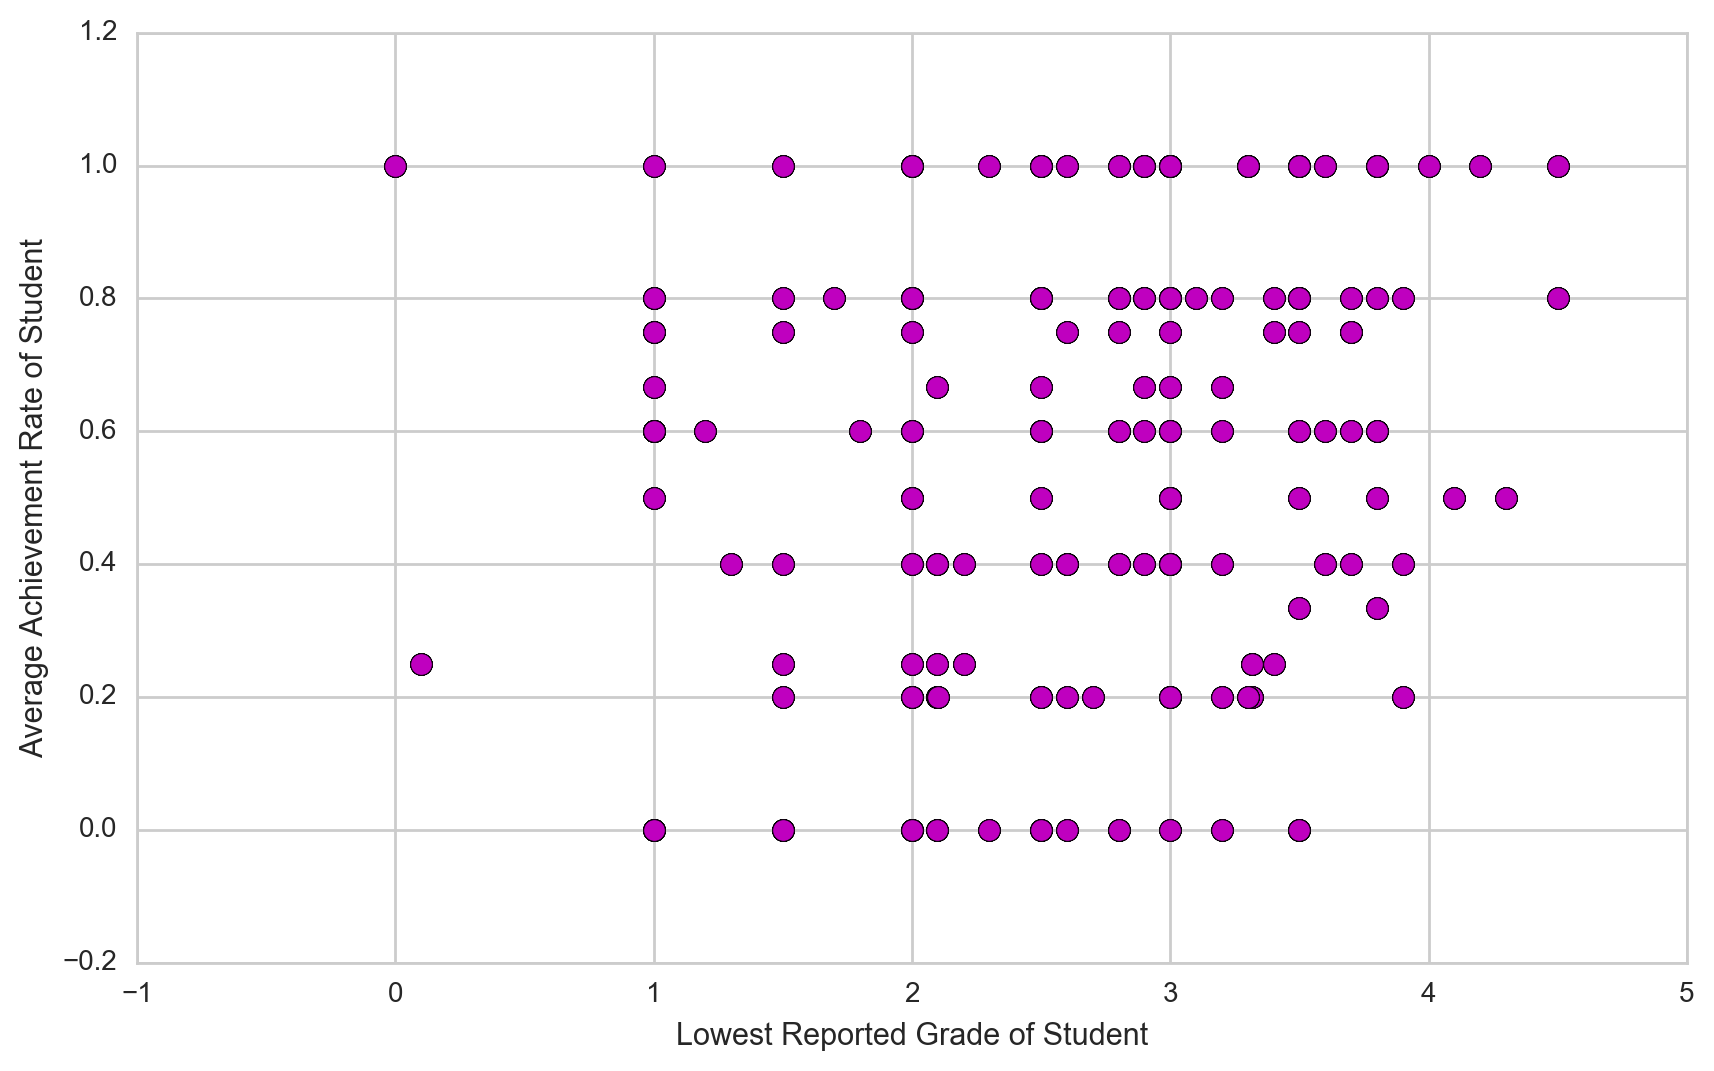

In [60]:
#Visualizing the scatter relationship between lowest reported grade and achievement of objectives
#At this stage there doesn't seem to be a strong or easily recognizable relationship.  Perhaps a histogram or 
#a further grouping of the available data on gender will assist in revealing something noteworthy.

fig = plt.figure(figsize=(10,6))
plt.scatter(df['TestWeakestGrade'], df['MeanAchievedIndividual'], s=60, c='m', marker=u'o')
plt.xlabel("Lowest Reported Grade of Student")
plt.ylabel("Average Achievement Rate of Student")
plt.show()

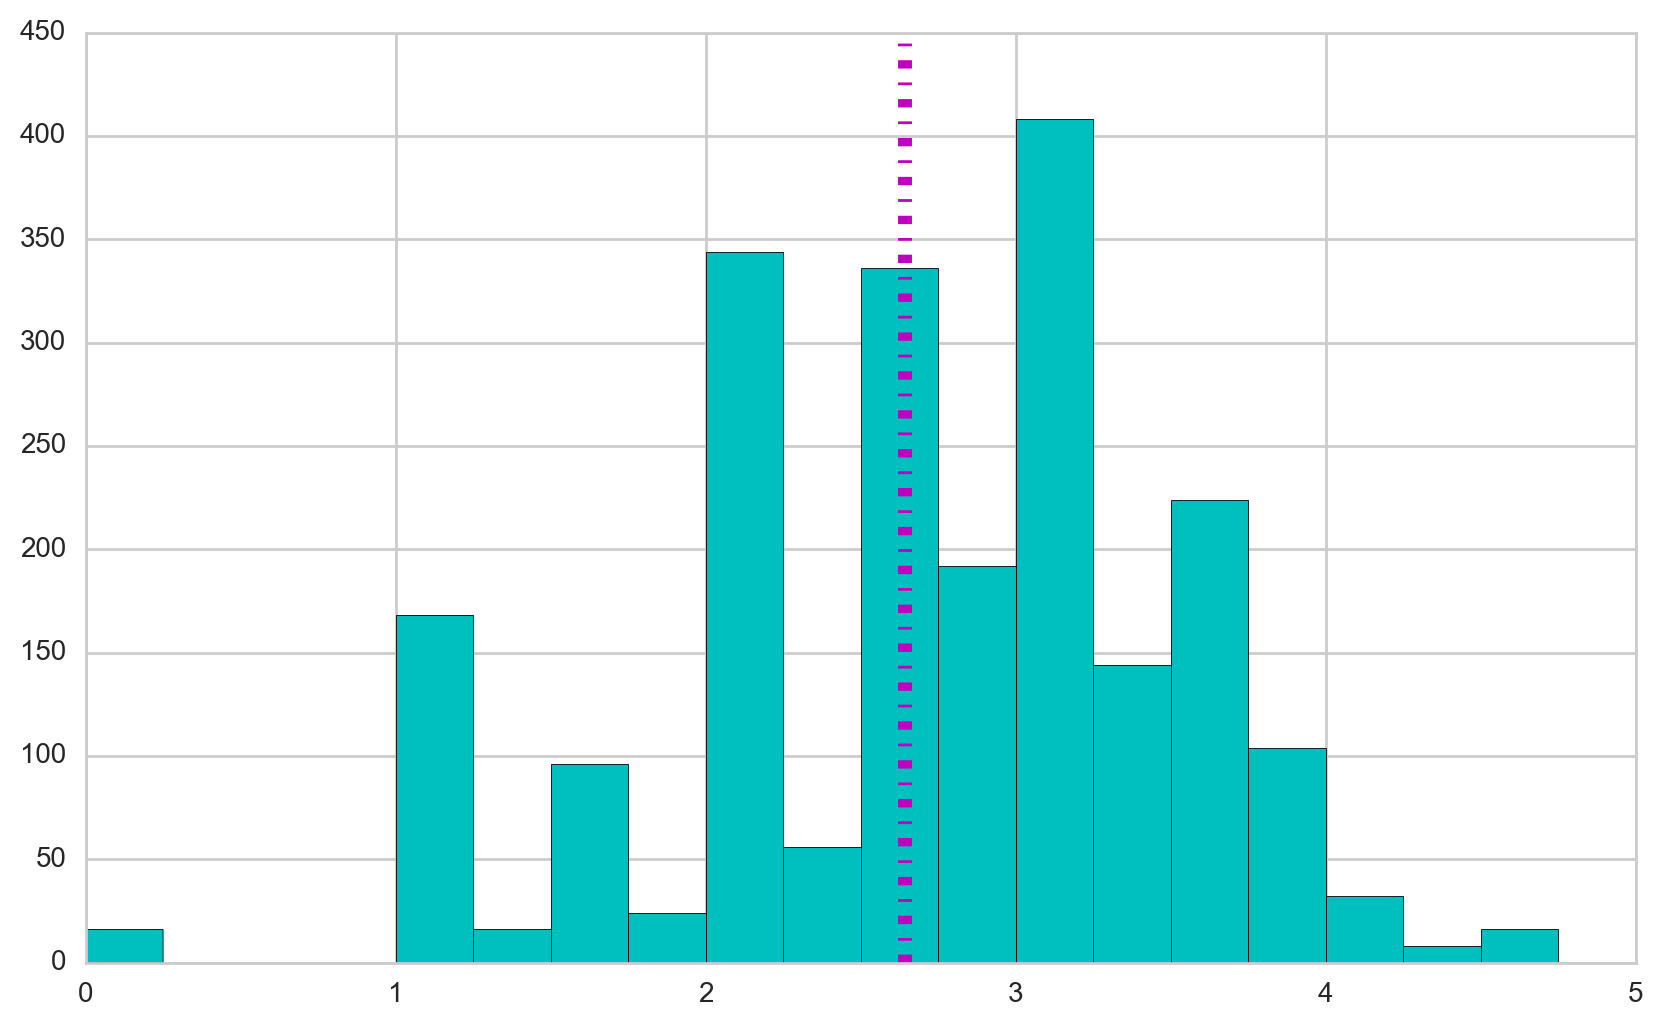

In [37]:
#Plotting the distribution of the reported lowest grades by each student.  With distribution, it is easier to see if there 
#exist any breakpoints in the reported grades at specific levels i.e. before and after passing

#3 is considered the lowest passing grade in the school system.  The histogram shows a large portion of students
#reporting just over 3.0 as their lowest grade

fig = plt.figure(figsize=(10,6))
result = plt.hist(df['TestWeakestGrade'], bins=20, range=[0,5], color='c')
plt.axvline(df['TestWeakestGrade'].mean(), color='m', linestyle='dashdot', linewidth=5)


In [30]:
df['TestWeakestGrade'].describe().T

count    2184.000000
mean        2.641794
std         0.824696
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max         4.500000
Name: TestWeakestGrade, dtype: float64

In [81]:
#Attempted the use of some of the Aalti

from altair import *
from altair import Chart


In [93]:
#Really wanted to do a comparison chart between genders here for the different jobs that students reported
#they would like to have at age 25 and the frequency with which they occur (like the altair package example from lab 1.3), but
#I couldn't quite get it to work out.  Perhaps this is something we can explore further in the future.  I was able to download 
#and install the altair package onto my pc though and install it into the notebook.

Chart(df).mark_bar().encode(y='Jobat25', x='average(MeanAchievedIndividual)', color='Gender:N')

UnicodeDecodeError: 'utf8' codec can't decode byte 0x92 in position 5: invalid start byte

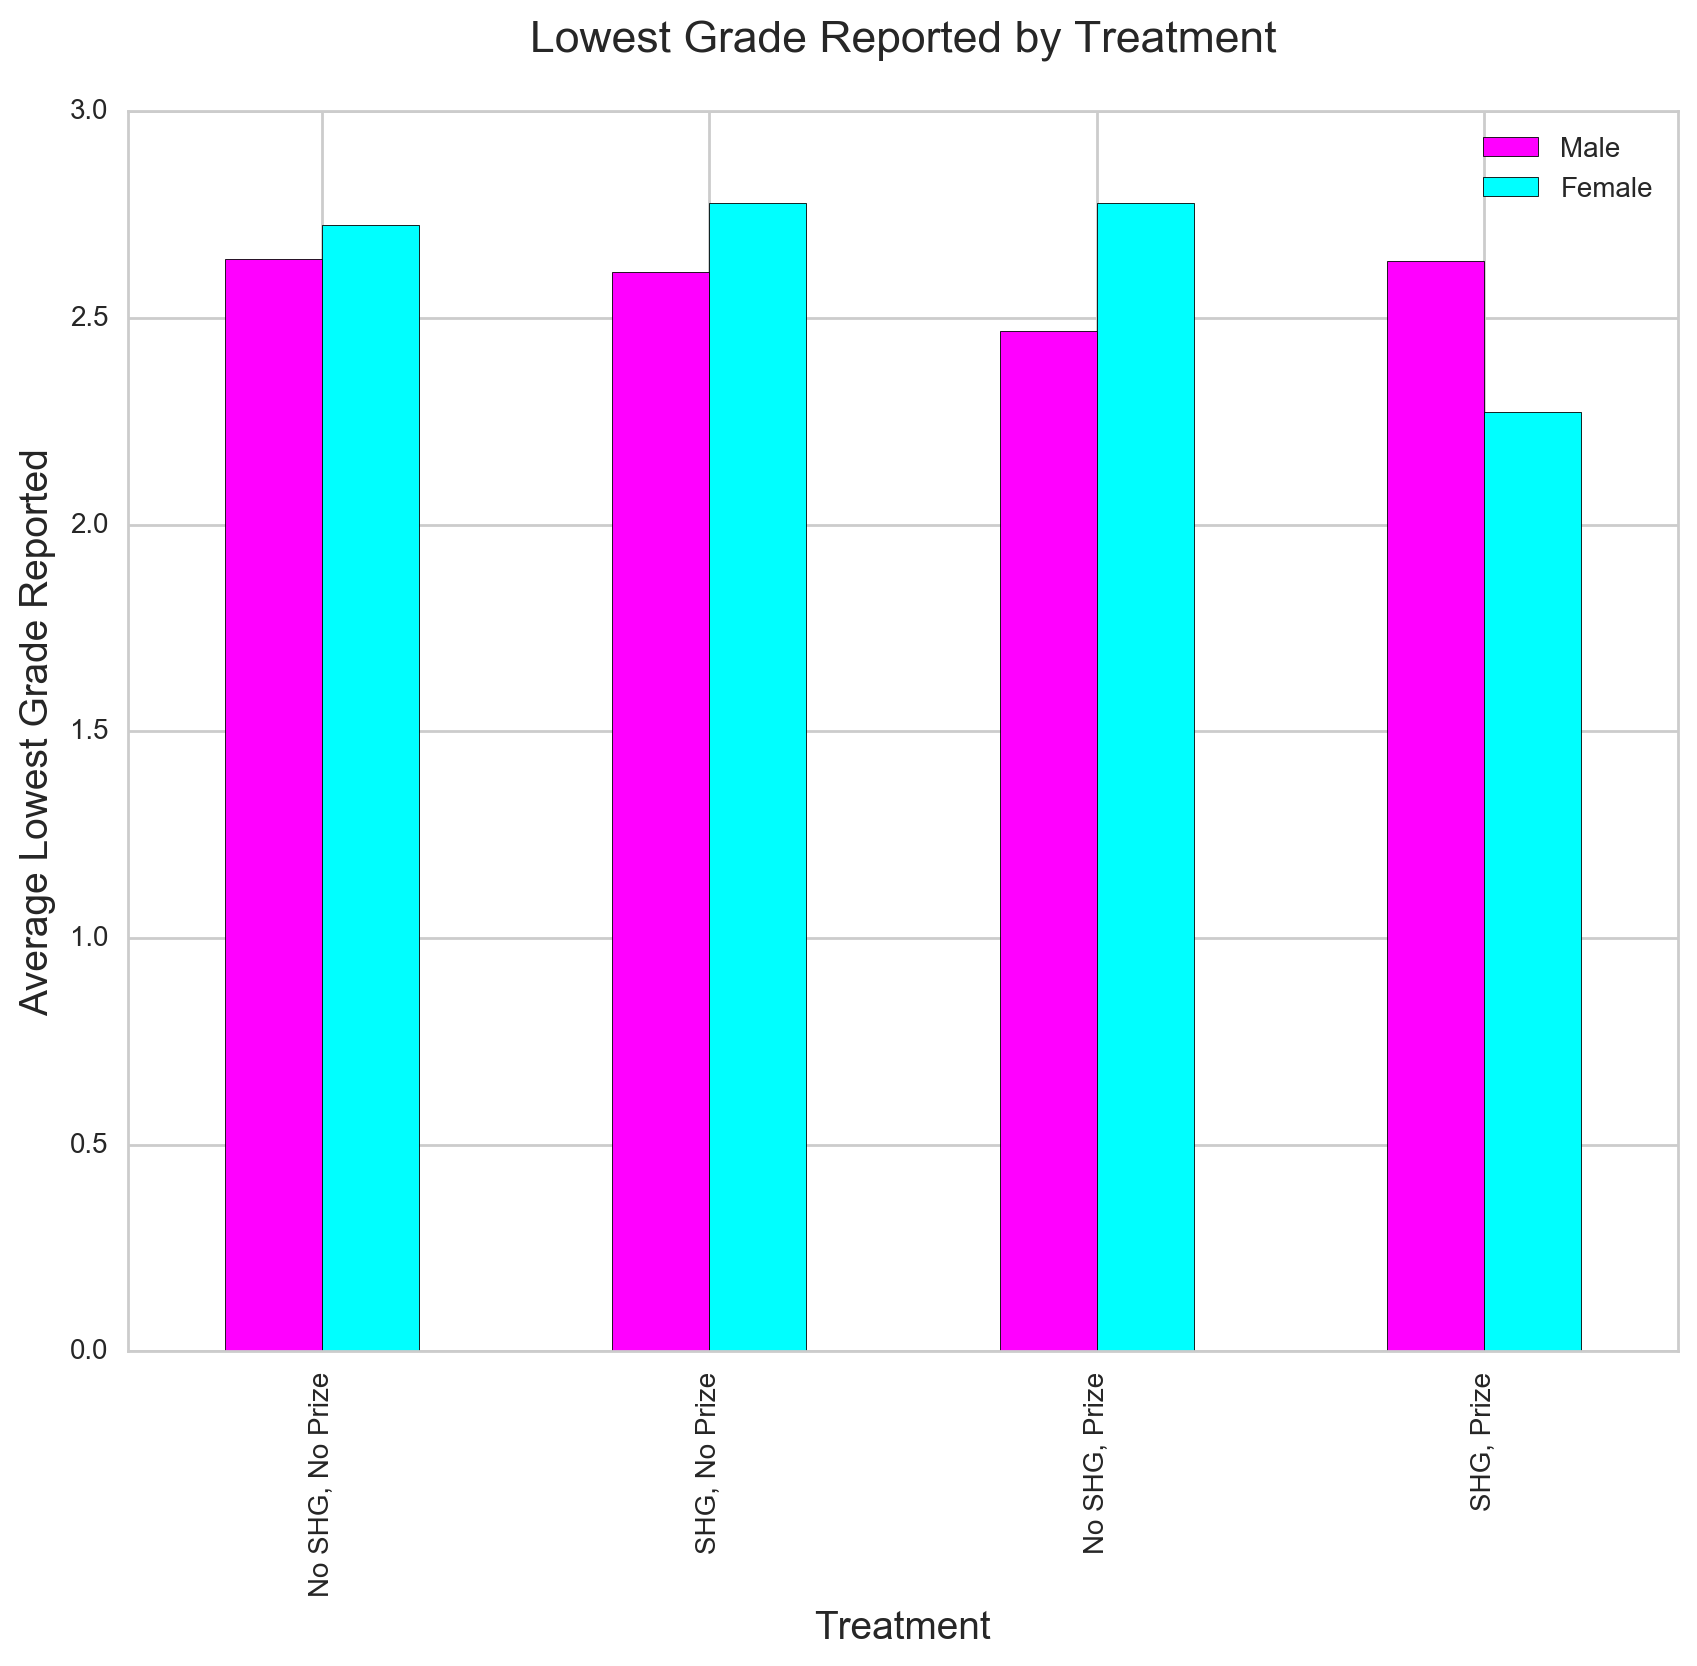

In [98]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df[df['TreatmentGroup']!=1].groupby(['TreatmentGroup','Gender'])['TestWeakestGrade'].mean().unstack().plot(kind="bar"
                                                        ,color=['magenta', 'cyan'],
                                                        ax=ax)
plt.xlabel("Treatment", fontsize=14)
plt.ylabel("Average Lowest Grade Reported", fontsize=14)
plt.xticks([0, 1, 2, 3], ["No SHG, No Prize", "SHG, No Prize", "No SHG, Prize",'SHG, Prize'])
plt.title('Lowest Grade Reported by Treatment\n', fontsize=16)
ax.legend(['Male', 'Female'])
plt.show()

In [103]:
sns.distplot?

In [102]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)


In [104]:
x = df[df[TreatmentGroup]==1['MealsMissed']

SyntaxError: unexpected EOF while parsing (<ipython-input-104-e6d581513ab2>, line 1)

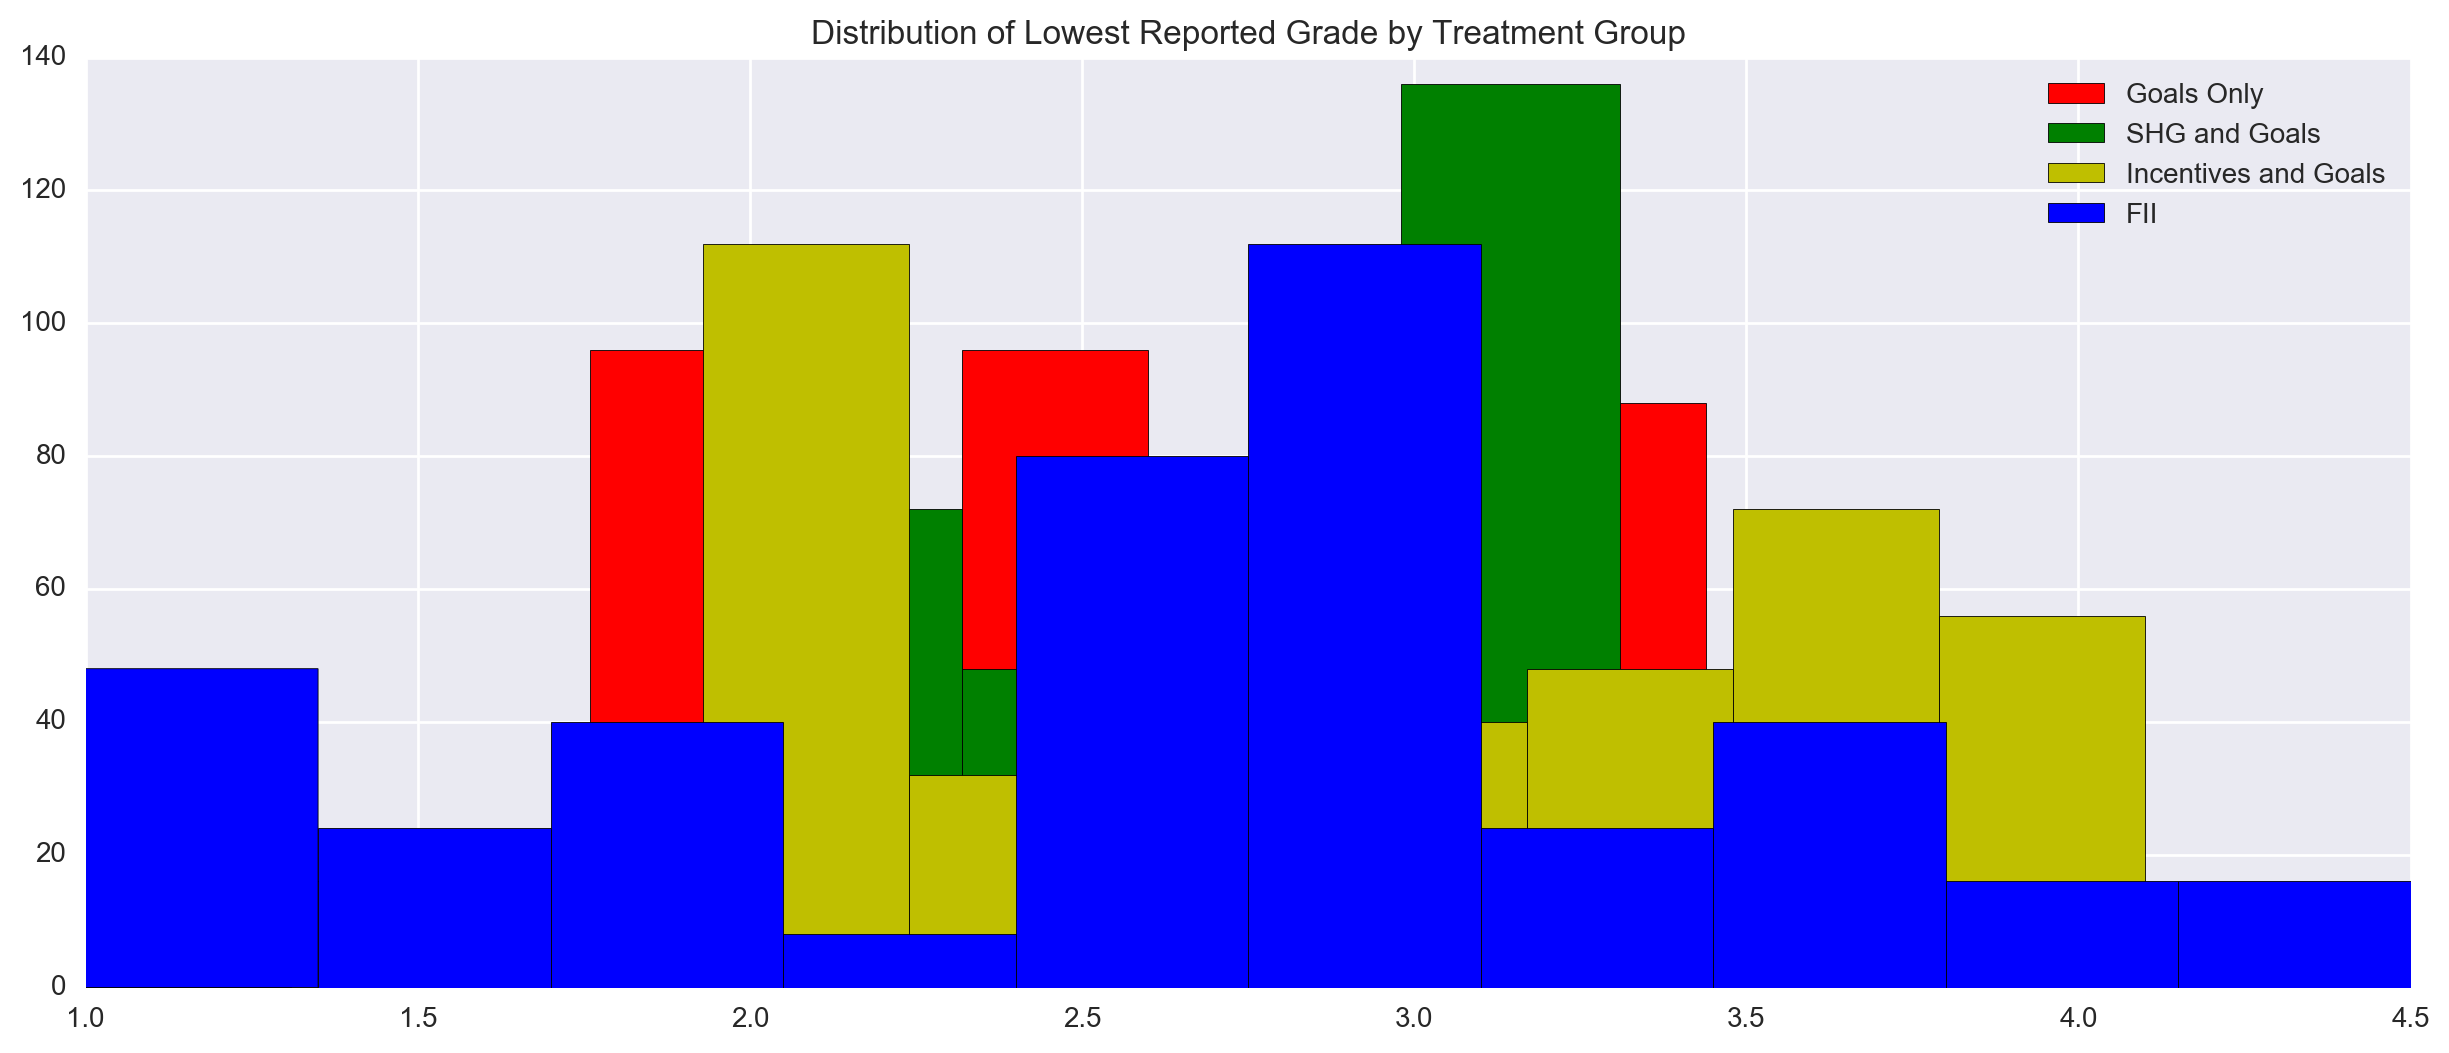

In [109]:
fig = plt.figure(figsize=(15,6))
df[df['TreatmentGroup']==1]['TestWeakestGrade'].hist(color='r', label='Goals Only')
df[df['TreatmentGroup']==2]['TestWeakestGrade'].hist(color='g', label='SHG and Goals')
df[df['TreatmentGroup']==3]['TestWeakestGrade'].hist(color='y', label='Incentives and Goals')
df[df['TreatmentGroup']==4]['TestWeakestGrade'].hist(color='b', label= "FII")

plt.title('Distribution of Lowest Reported Grade by Treatment Group')
plt.legend(loc='upper right')
plt.show()

#Visualizing the lowest reported grades distribution by treatment group actually does show that there is 
#some disparity between the groups and may be of concern are interest when modeling.

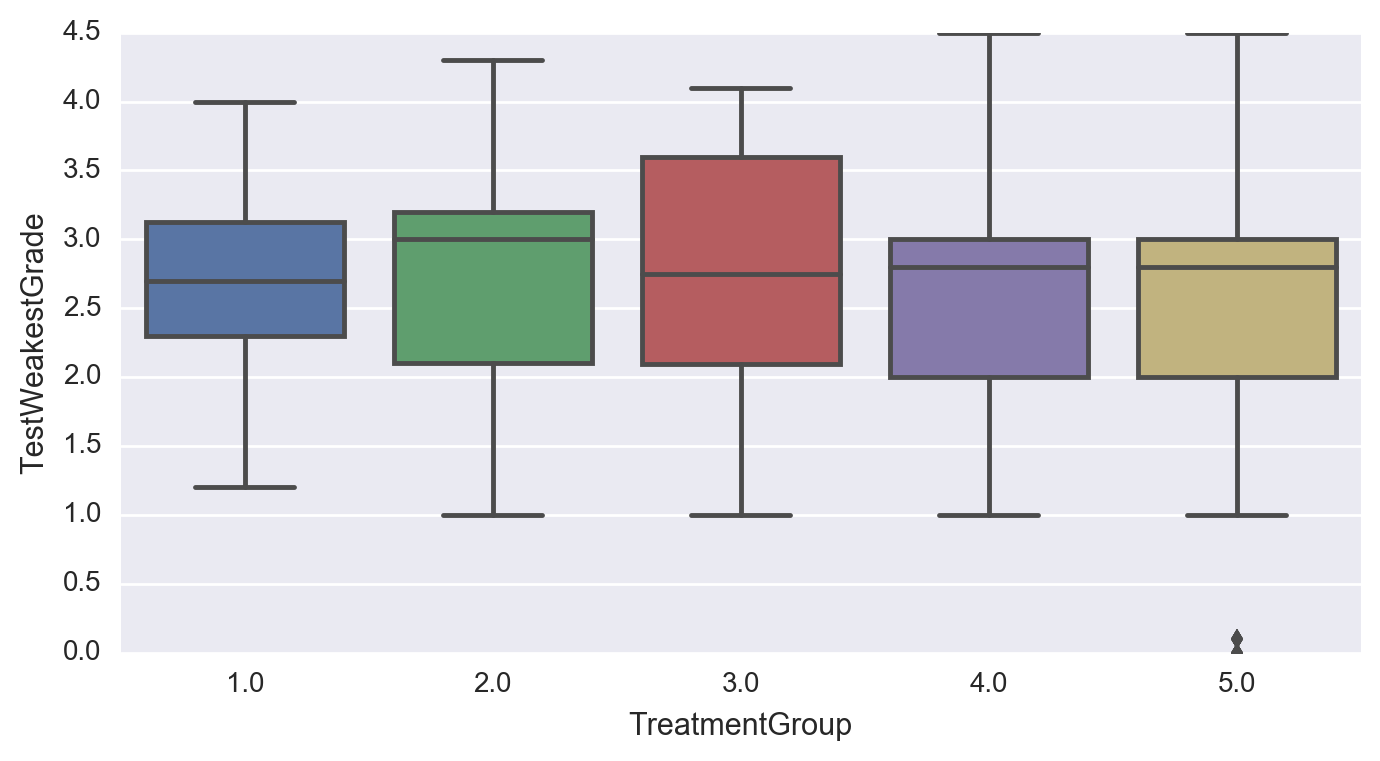

In [111]:
#box and whisker plots of lowest reported grade so that standard deviation and mean are easily visualized between subgroups.

ax = sns.boxplot(x="TreatmentGroup", y="TestWeakestGrade", data=df)

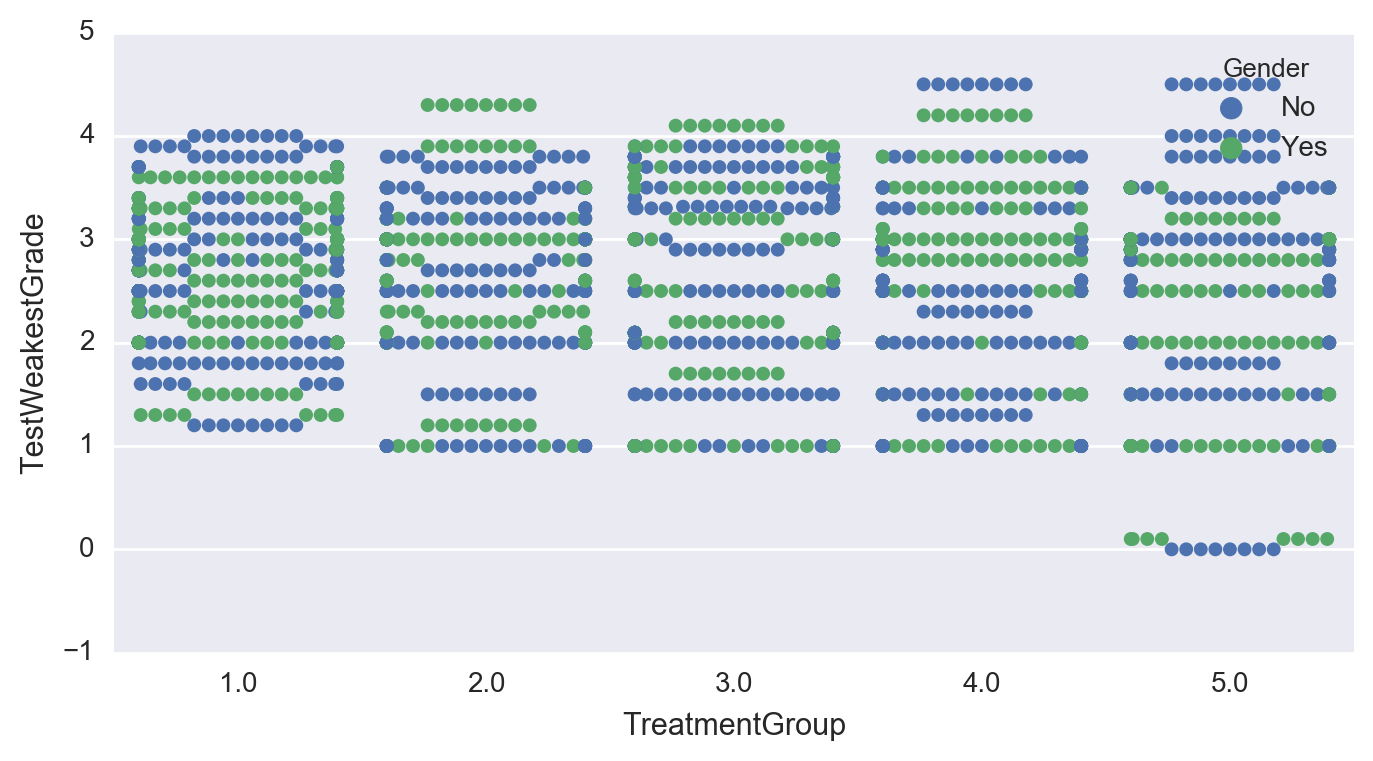

In [115]:
sns.swarmplot(x="TreatmentGroup", y="TestWeakestGrade", hue="Gender", data=df)

([<matplotlib.axis.XTick at 0x14815208>,
 <a list of 4 Text xticklabel objects>)

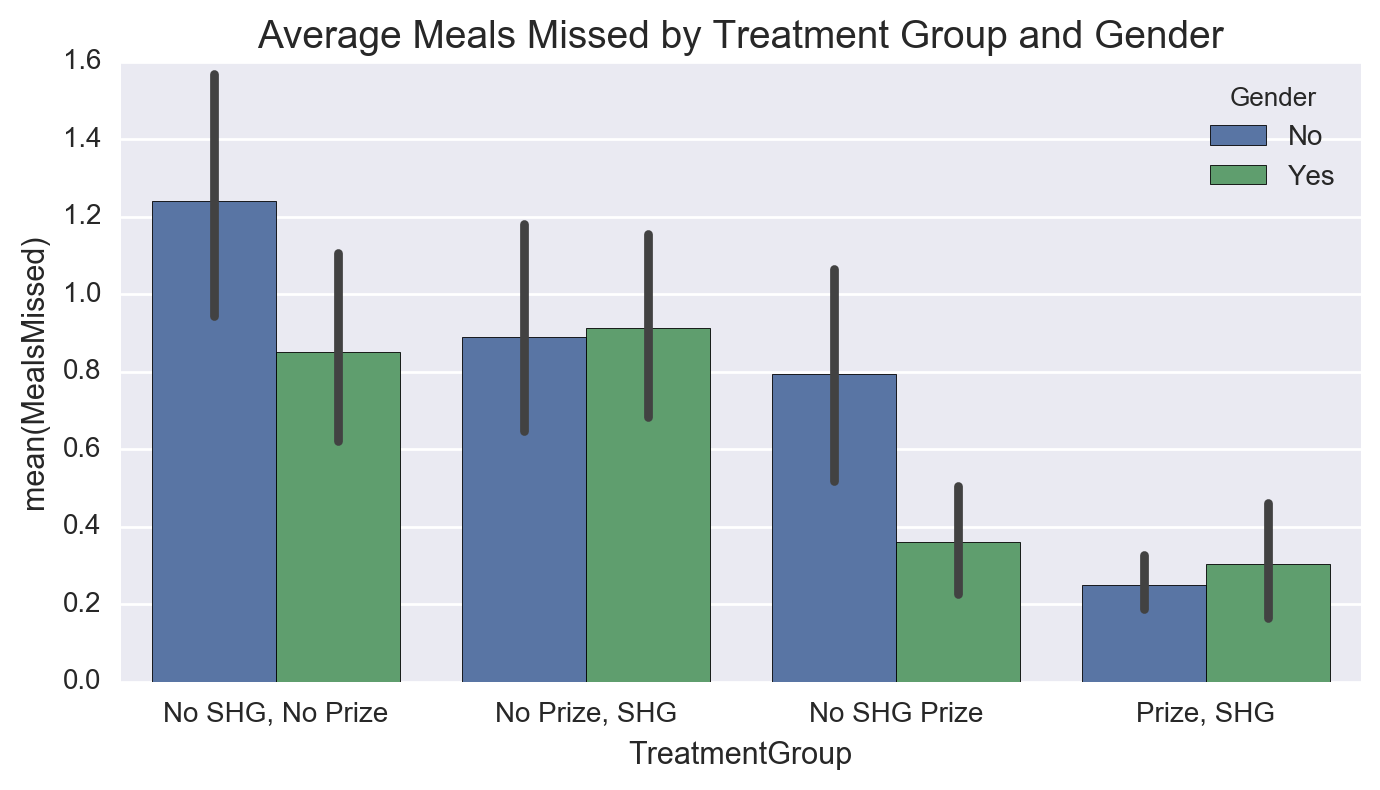

In [137]:
##Visualizing the diffferent Meals missed that are reported by students in different treatment groups by Gender.

##This is possibly due to the panel type data set although this same graph appears fine when exploring the achievement rate.
sns.barplot(x=df[df['TreatmentGroup']!=1]["TreatmentGroup"], y="MealsMissed", hue="Gender", data=df)

plt.title('Average Meals Missed by Treatment Group and Gender', fontsize=14)
plt.xticks([0,1,2,3], ['No SHG, No Prize', 'No Prize, SHG', 'No SHG Prize', 'Prize, SHG'])

([<matplotlib.axis.XTick at 0x163991d0>,
 <a list of 4 Text xticklabel objects>)

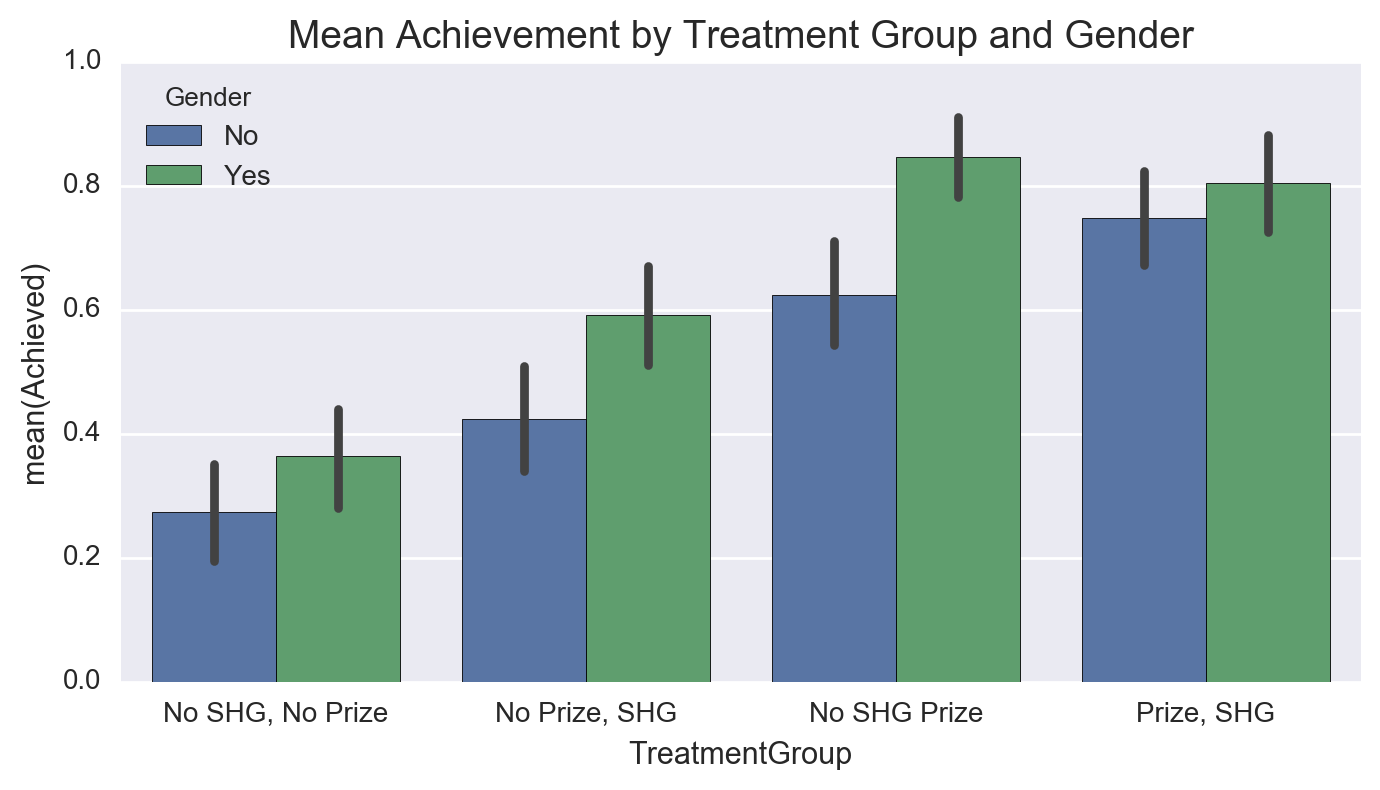

In [152]:
#The lack of difference in objective achievement.  Here I excluded the first treatment group, because they did not set goals

sns.barplot(x=df[df['TreatmentGroup']!=1]["TreatmentGroup"], y="Achieved", hue="Gender", data=df)

plt.title('Mean Achievement by Treatment Group and Gender', fontsize=14)
plt.xticks([0,1,2,3], ['No SHG, No Prize', 'No Prize, SHG', 'No SHG Prize', 'Prize, SHG'])

([<matplotlib.axis.XTick at 0x18793358>,
 <a list of 5 Text xticklabel objects>)

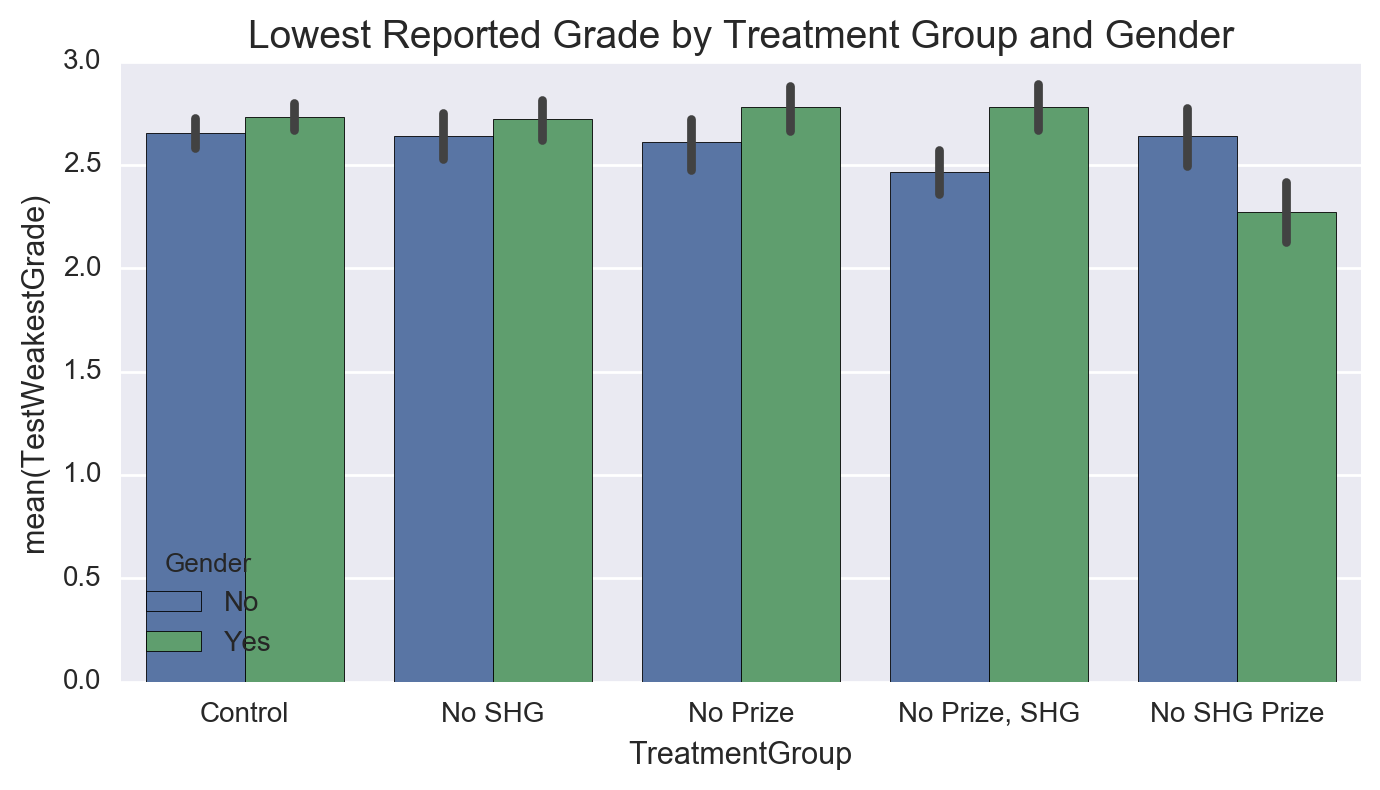

In [149]:
#The lack of difference in reported lowest grade (at the beginning of the experiment) is important as the 
#different treatment groups should be comparable. 

sns.barplot(x="TreatmentGroup", y="TestWeakestGrade", hue="Gender", data=df)


plt.title('Lowest Reported Grade by Treatment Group and Gender', fontsize=14)
plt.xticks([0,1,2,3,4], ['Control','No SHG', 'No Prize', 'No Prize, SHG', 'No SHG Prize', 'Prize, SHG'])

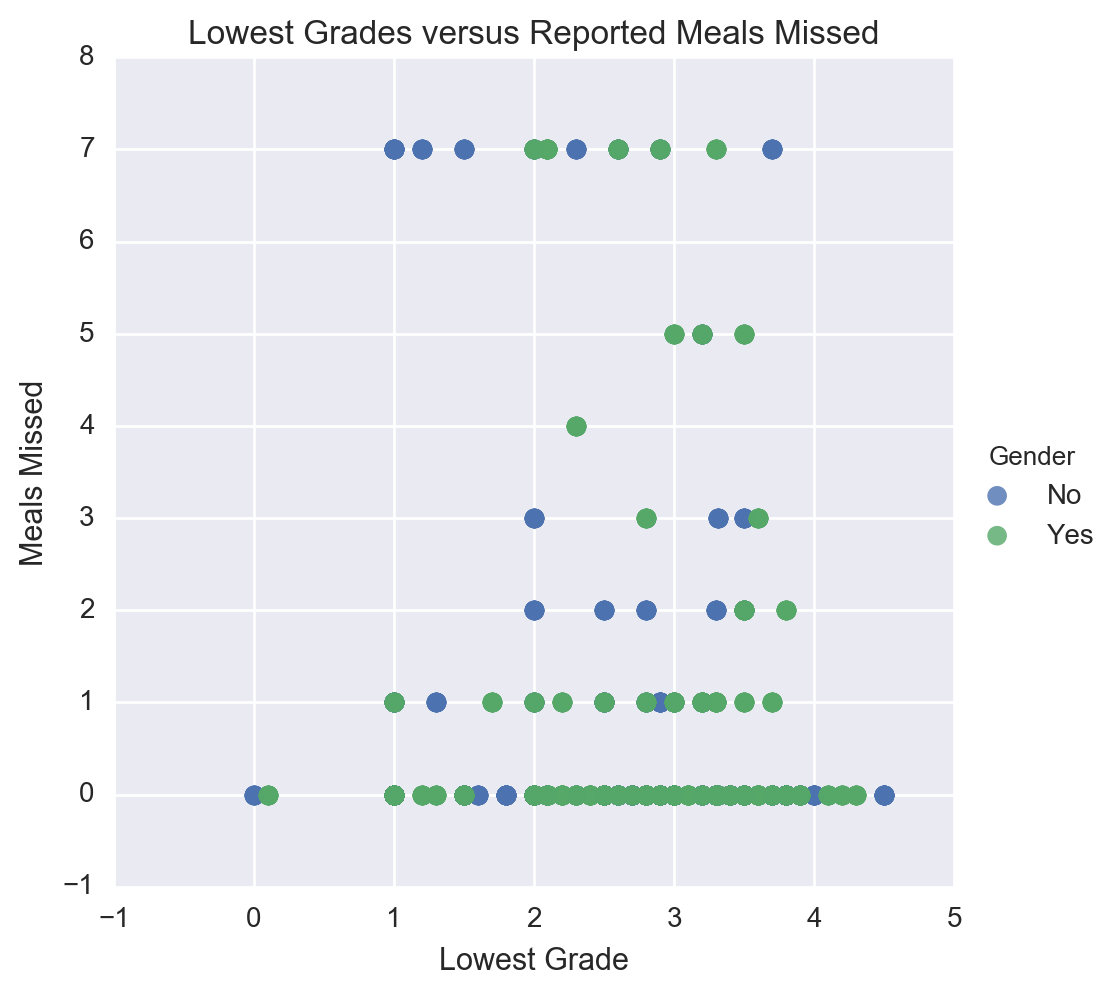

In [144]:
sns.lmplot('TestWeakestGrade', 'MealsMissed', 
           data=df, 
           fit_reg=False, 
           hue="Gender",  
           scatter_kws={"marker": "D", 
                        "s": 50})
plt.title('Lowest Grades versus Reported Meals Missed')
plt.xlabel('Lowest Grade')
plt.ylabel('Meals Missed')

### Report Write-UP

    Through the exploration of my data using pandas, the statistical packages of numpy, and visualization techniques provided in seaborn and matplotlib, I have gained a better working knowledge of python coding as well as my current limitations.  This project provided excellent perspective on how my dataset can be manipulated to more efficiently come to analysis conclusions.
	
    After initial sifting through the relevant datatypes of my series and the layout of the dataframe, I explored the relationships between a few select variables that are hugely relevant for my thesis work.  The data in question were collected from an experiment undertaken this past summer in Medellin, Colombia with disadvantaged 9th graders enrolled in 7 schools spread out across the city.  Analyzing respective genders in the different schools, the demographic statistics for each treatment arm, reported number of meals missed to economic conditions, as well as the educational performance and achievement of set objectives highlighted some unique findings. 
	
    Of particular note is that in one of the final boxplots, it is obvious that there is a difference between the objective achievements between different treatment groups.  This merits further analysis and hints that the experiment as a whole will likely be able to reject the null hypothesis of no effect.  
	
    When comparing meals missed and educational performance, with genders present by color, it appears that females overall miss less meals and have higher grades.  A strong correlation between relationships is often telling, but the same can be said for the reverse.  Finding insignificant differences between lowest reported grades in different treatment groups reinforces the idea that the different schools chosen for the experiment are highly comparable to one another, at least in the educational performance aspect.  This aspect is the main outcome of interest (data yet to arrive) and so is the most important to lack disparity between groups at the onset. 
